In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from datetime import timedelta  

# 1. Import du csv

In [33]:
df = pd.read_csv('ind_bretagne_agglo.csv', sep=',')
df.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_177499d2aa0_-6c78,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_177499d2aa0_-6c77,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_177499d2aa0_-6c76,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_177499d2aa0_-6c75,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_177499d2aa0_-6c74,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


## 1.1 Echelle de qualité

In [34]:
echelle = pd.concat([pd.DataFrame(df['qualif'].unique(), columns=['Qualité']), pd.DataFrame([i for i in range(1,(len(df['qualif'].unique())+1))], columns=['Valeur'])], axis=1)
echelle

,Qualité,Valeur
0,Bon,1
1,Très bon,2
2,Moyen,3
3,Médiocre,4
4,Mauvais,5


## 1.2 Analyse de la qualité de l'air pendant l'année 2020

### 1.2.1 Selection des colonnes et affichage

In [35]:
df_1 = df[['date_ech', 'valeur', 'qualif', 'lib_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10', 'val_pm25']].copy()
df_1['date_ech'] = pd.to_datetime(df['date_ech']).dt.date

In [36]:
df_1.head()

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,0,0
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,0,0
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0


### 1.2.2 Valeur moyenne de la qualité de l'air par jour en Bretagne :

In [37]:
evolution_valeur = df_1.groupby('date_ech')['valeur'].mean()
evolution_valeur.head()

date_ech
2020-01-01    3.000000
2020-01-02    3.142857
2020-01-03    3.428571
2020-01-04    3.142857
2020-01-05    4.000000
Name: valeur, dtype: float64

### 1.2.3 Définition des axes x et y pour une visualisation graphique

In [38]:
x = evolution_valeur.index.to_series()
y = np.array(evolution_valeur)

#Test d'utilisation timedelta
type(x[0])
x[0] + timedelta(days=1)

datetime.date(2020, 1, 2)

### 1.2.4 Recherche des index pendant les périodes de confinement

In [39]:
index_evolution_valeur= np.array(pd.DataFrame(evolution_valeur).index)

#Fonction pour trouver l'index d'une date
def found_index(liste_index, annee, mois, jour):
    target = datetime.date(annee, mois, jour)
    for i, elem in enumerate(liste_index):
        if elem == target:
            return i
        
index_start_conf1 = found_index(index_evolution_valeur, 2020, 3, 17)
index_end_conf1 = found_index(index_evolution_valeur, 2020, 5, 10)
index_start_conf2 = found_index(index_evolution_valeur, 2020, 10, 30)
index_end_conf2 = found_index(index_evolution_valeur, 2020, 12, 15)

### 1.2.5 Visualisation graphique de la qualité de l'air pendant l'année 2020

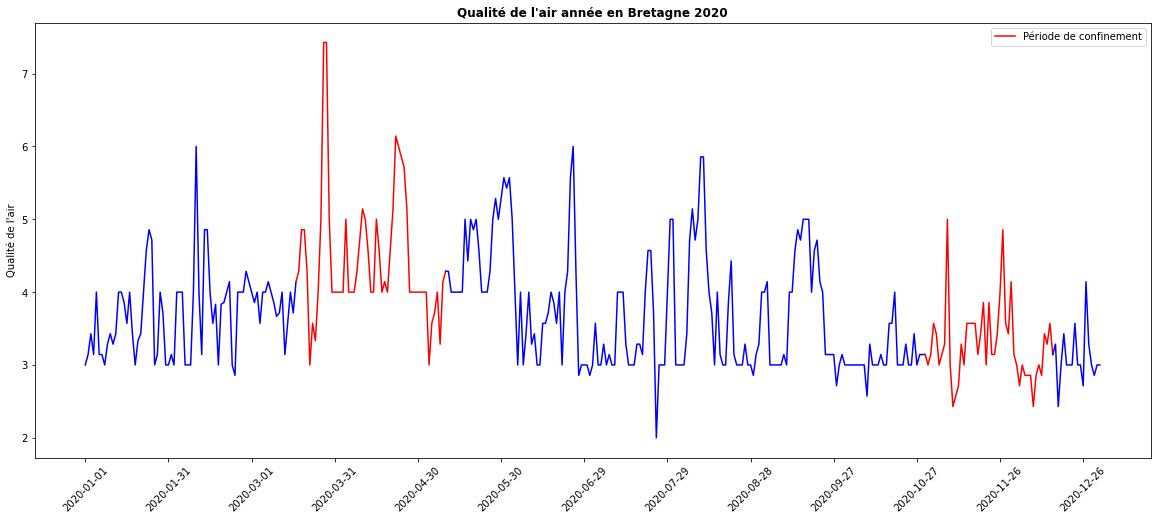

In [40]:
plt.figure(figsize=(20,8))
plt.plot(x[:index_start_conf1+1], y[:index_start_conf1+1], c='blue')
plt.plot(x[index_start_conf1:index_end_conf1+1], y[index_start_conf1:index_end_conf1+1], c='red', label='Période de confinement')
plt.plot(x[index_end_conf1:index_start_conf2+1], y[index_end_conf1:index_start_conf2+1], c='blue')
plt.plot(x[index_start_conf2:index_end_conf2+1], y[index_start_conf2:index_end_conf2+1], c='red')
plt.plot(x[index_end_conf2:], y[index_end_conf2:], c='blue')
plt.ylabel('Qualité de l\'air')
plt.title('Qualité de l\'air année en Bretagne 2020', fontdict={'weight':'bold'})
plt.legend()
plt.xticks(np.arange(x[0],x[-1], step=30), rotation=45)

plt.show()

On peut remarquer que la courbe a la même allure pendant les périodes de confinement. Un pic en début et fin des deux confinements. 

Nous pouvons également remarquer que lors du 1er confinement la qualité de l'air est particulièrement mauvaise. En effet, les valeurs minimales pendant cette période sont, dans l'ensemble, égales aux valeurs maximales des mois précédent.

### 1.2.6 Visualisation graphique de la qualité de l'air en 2020 par ville

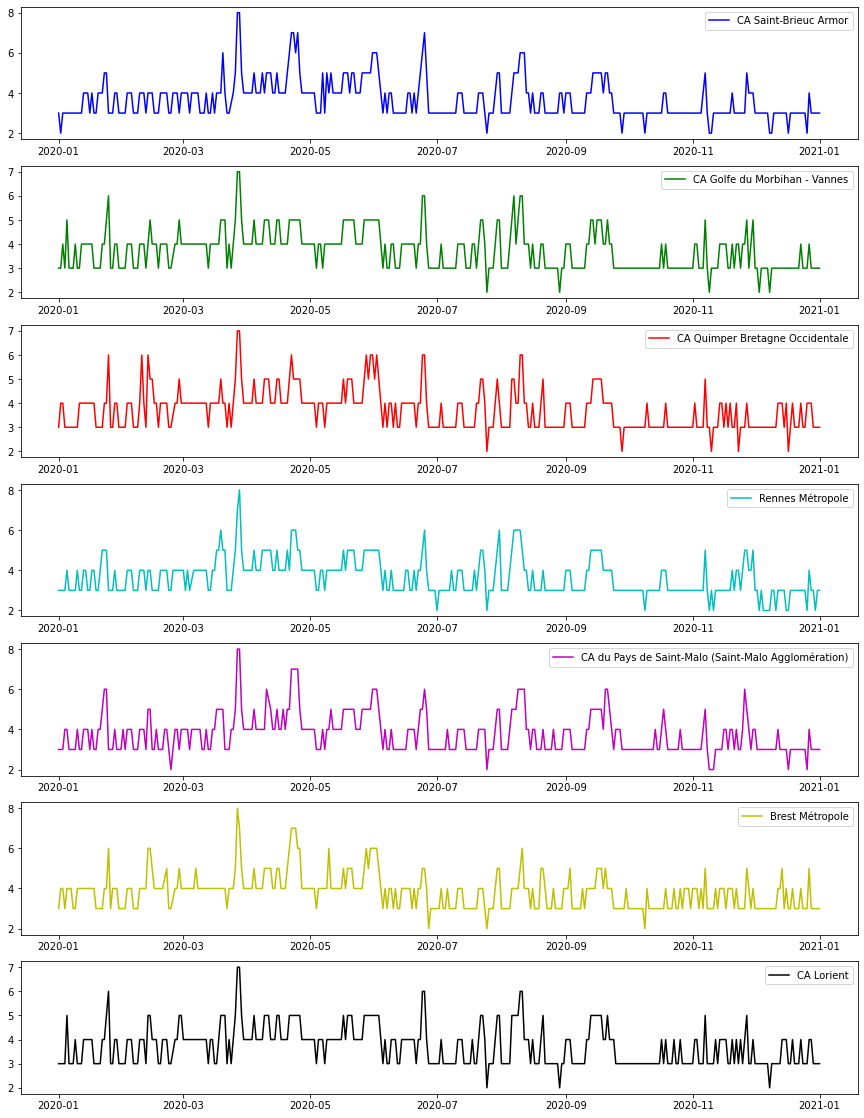

In [41]:
colors = ['b','g','r','c','m','y','k']
villes = np.array(df['lib_zone'].unique())
plt.figure(figsize=(15, 20))
i = 1
for color, ville in zip(colors,villes):
    df_plot = df_1[df_1['lib_zone']==ville]
    x = np.array(df_plot['date_ech'])
    y = np.array(df_plot['valeur'])
    plt.subplot(7, 1, i)
    plt.plot(x, y, label=f'{ville}', c=color)
    plt.legend()
    i += 1
plt.show()

A quelques différences près, nous pouvons remarquer que les courbes suivent la même tendance.

# 2. Analyse de la composition de l'air du 1er confinement

Nous allons analyser la composition du pic de début et de fin du 1er confinement 

In [42]:
#DataFrame avec les données pendant le 1er confinement
df_conf_1 = df_1[(df_1['date_ech']>datetime.date(2020, 2, 17)) & (df_1['date_ech']<datetime.date(2020, 6, 10))]
df_conf_1.head()

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
1442,2020-06-09,4,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,0,4,3,0
1443,2020-06-09,4,Bon,Rennes Métropole,1,0,4,3,0
1444,2020-06-09,4,Bon,Brest Métropole,1,0,4,3,0
1445,2020-06-09,4,Bon,CA Saint-Brieuc Armor,2,0,4,3,0
1446,2020-06-09,4,Bon,CA Lorient,1,0,4,2,0


## 2.1 Visualisation graphique de la qualité de l'air pendant le premier confinement

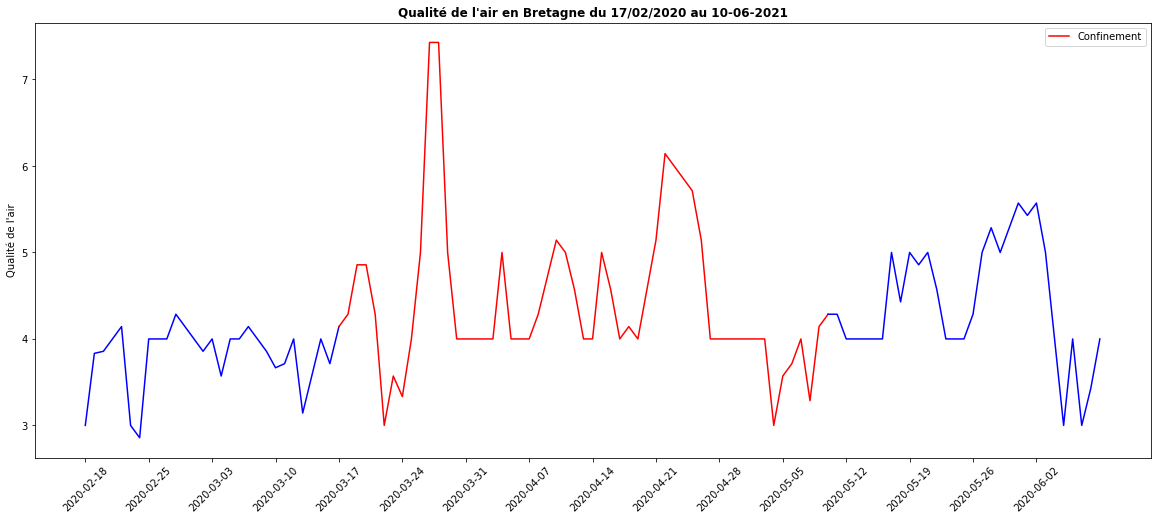

In [43]:
#Pour avoir les valeurs moyennes en Bretagne
evolution_valeur_conf_1 = df_conf_1.groupby('date_ech')['valeur'].mean()

#Valeurs abscisses et ordonnées
x_bis = evolution_valeur_conf_1.index.to_series()
y_bis = np.array(evolution_valeur_conf_1)

#Récupère l'index dans une variable
index_evolution_valeur_conf1= np.array(pd.DataFrame(evolution_valeur_conf_1).index)

#Trouve l'index des dates
index_start_conf1 = found_index(index_evolution_valeur_conf1, 2020, 3, 17)
index_end_conf1 = found_index(index_evolution_valeur_conf1, 2020, 5, 10)

#Tracé du graph
plt.figure(figsize=(20,8))
plt.plot(x_bis[:index_start_conf1+1], y_bis[:index_start_conf1+1], c='b')
plt.plot(x_bis[index_start_conf1:index_end_conf1+1], y_bis[index_start_conf1:index_end_conf1+1], c='r', label='Confinement')
plt.plot(x_bis[index_end_conf1:], y_bis[index_end_conf1:], c='b')
plt.ylabel('Qualité de l\'air')
plt.title('Qualité de l\'air en Bretagne du 17/02/2020 au 10-06-2021', fontdict={'weight':'bold'})
plt.xticks(np.arange(x_bis[0],x_bis[-1], step=7), rotation=45)
plt.legend()
plt.show()

## 2.2 Pic - DEBUT

Afin d'analyser ce pic, nous commençons par identifer les dates du pic ainsi que sa valeur maximale.
Nous construisons donc un DataFrame dans un premier temps. 

In [44]:
x_bis = pd.DataFrame(x_bis)
x_bis.index = [i for i in range(len(x_bis))]
y_bis = pd.DataFrame(y_bis)
y_bis.columns= ['Valeur Moyenne']
df_bis = pd.concat([x_bis, y_bis], axis=1)
df_bis.head()

,date_ech,Valeur Moyenne
0,2020-02-18,3.000000
1,2020-02-19,3.833333
2,2020-02-20,3.857143
3,2020-02-21,4.000000
4,2020-02-22,4.142857


### 2.2.1 Recherche de l'index

In [45]:
df_bis['Valeur Moyenne'].idxmax()

38

In [46]:
df_bis.iloc[38,:]

date_ech          2020-03-27
Valeur Moyenne       7.42857
Name: 38, dtype: object

Le début du pic **max** est le Vendredi 27 Mars 2020, soit 10 jours après le début de confinement avec une valeur moyenne de 7,42. 

### 2.2.2 Analyse de la composition de l'air pendant le premier pic

In [47]:
df_conf1_pic1 = df_1[(df_1['date_ech']==datetime.date(2020, 3, 27))].copy()
df_conf1_pic1.head(7)

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
1959,2020-03-27,8,Mauvais,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,4,8,0
1960,2020-03-27,8,Mauvais,CA Saint-Brieuc Armor,2,0,4,8,0
1961,2020-03-27,7,Médiocre,CA Golfe du Morbihan - Vannes,1,0,5,7,0
1962,2020-03-27,7,Médiocre,CA Lorient,1,0,4,7,0
1963,2020-03-27,7,Médiocre,Rennes Métropole,1,0,5,7,0
1964,2020-03-27,7,Médiocre,CA Quimper Bretagne Occidentale,1,0,5,7,0
1965,2020-03-27,8,Mauvais,Brest Métropole,1,0,5,8,0


### 2.2.3 Visualisation graphique de la composition de l'air par ville au premier pic

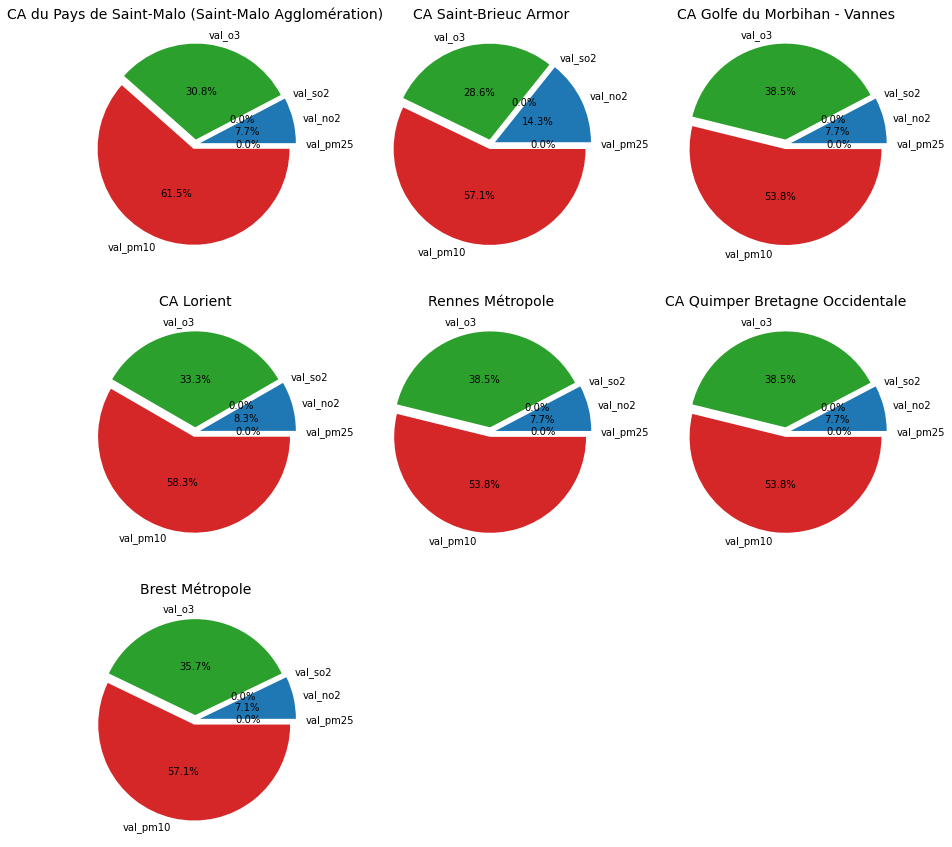

In [48]:
labels = np.array(df_conf1_pic1['lib_zone'])
df_conf1_pic1 = df_conf1_pic1.drop(['lib_zone','date_ech', 'valeur', 'qualif'], axis=1)
x = np.array(df_conf1_pic1)

plt.figure(figsize=[15,15])
i = 1
for ville, indices in zip(labels, x):
    plt.subplot(3, 3, i)
    labels = df_conf1_pic1.columns
    plt.pie(x=indices, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title(f"{ville}", fontsize=14)
    i += 1

Pendant ce premier pic, nous pouvons remarquer que la composition de l'air est globalement identique partout en Bretagne avec un fort taux de particules en suspension pm10. 

#### Préparation des données pour une cartographie

In [49]:
df_carto = df[['date_ech', 'valeur', 'qualif', 'lib_zone', 'geom', 'val_no2', 'val_so2', 'val_o3', 'val_pm10', 'val_pm25']].copy()
df_carto['date_ech'] = pd.to_datetime(df_carto['date_ech']).dt.date
df_carto.head()

,date_ech,valeur,qualif,lib_zone,geom,val_no2,val_so2,val_o3,val_pm10,val_pm25
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,POINT (269153.2682993477 6832824.934141148),0,0,0,0,0
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,POINT (269961.1106939723 6746307.8992528645),0,0,0,0,0
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,POINT (172753.63056731108 6795400.543816281),0,0,0,0,0
3,2021-01-01,3,Bon,Rennes Métropole,POINT (349555.0070453745 6789093.386528317),0,0,0,0,0
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,POINT (338719.75810268405 6844013.788199687),0,0,0,0,0


In [50]:
df_carto_1 = df_carto[(df_carto['date_ech']==datetime.date(2020, 3, 27))].copy()
df_carto_1 = df_carto_1.drop(['date_ech','qualif'], axis=1)
df_carto_1

,valeur,lib_zone,geom,val_no2,val_so2,val_o3,val_pm10,val_pm25
1959,8,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,POINT (338719.75810268405 6844013.788199687),1,0,4,8,0
1960,8,CA Saint-Brieuc Armor,POINT (269153.2682993477 6832824.934141148),2,0,4,8,0
1961,7,CA Golfe du Morbihan - Vannes,POINT (269961.1106939723 6746307.8992528645),1,0,5,7,0
1962,7,CA Lorient,POINT (229772.04043578357 6768639.926683848),1,0,4,7,0
1963,7,Rennes Métropole,POINT (349555.0070453745 6789093.386528317),1,0,5,7,0
1964,7,CA Quimper Bretagne Occidentale,POINT (172753.63056731108 6795400.543816281),1,0,5,7,0
1965,8,Brest Métropole,POINT (147878.22420658765 6837175.794037035),1,0,5,8,0


## 2.3 Pic - FIN

In [51]:
evolution_valeur_conf_1 = df_1[(df_1['date_ech']>datetime.date(2020, 4, 15))].groupby('date_ech')['valeur'].mean()
x_bis = evolution_valeur_conf_1.index.to_series()
y_bis = np.array(evolution_valeur_conf_1)

x_bis = pd.DataFrame(x_bis)
x_bis.index = [i for i in range(len(x_bis))]
y_bis = pd.DataFrame(y_bis)
y_bis.columns= ['Valeur Moyenne']
df_bis = pd.concat([x_bis, y_bis], axis=1)
df_bis.head()

,date_ech,Valeur Moyenne
0,2020-04-16,4.571429
1,2020-04-17,4.000000
2,2020-04-18,4.142857
3,2020-04-19,4.000000
4,2020-04-20,4.571429


### 2.3.1 Recherche de l'index

In [52]:
df_bis['Valeur Moyenne'].idxmax()

6

In [53]:
df_bis.iloc[6,:]

date_ech          2020-04-22
Valeur Moyenne       6.14286
Name: 6, dtype: object

Le pic **max** est le Mercredi 22 Avril 2020 avec une valeur moyenne de 7,42. 

### 2.3.2 Analyse de la composition de l'air pendant le deuxième pic

In [54]:
df_conf1_pic1 = df_1[(df_1['date_ech']==datetime.date(2020, 4, 22))].copy()
df_conf1_pic1.head(7)

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
1778,2020-04-22,6,Médiocre,CA Quimper Bretagne Occidentale,1,0,5,6,0
1779,2020-04-22,5,Moyen,CA Lorient,1,0,5,5,0
1780,2020-04-22,6,Médiocre,Rennes Métropole,1,0,5,6,0
1781,2020-04-22,7,Médiocre,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,5,7,0
1782,2020-04-22,7,Médiocre,CA Saint-Brieuc Armor,1,0,5,7,0
1783,2020-04-22,7,Médiocre,Brest Métropole,1,0,5,7,0
1784,2020-04-22,5,Moyen,CA Golfe du Morbihan - Vannes,1,0,5,5,0


### 2.3.3 Visualisation graphique de la composition de l'air par ville au deuxième pic

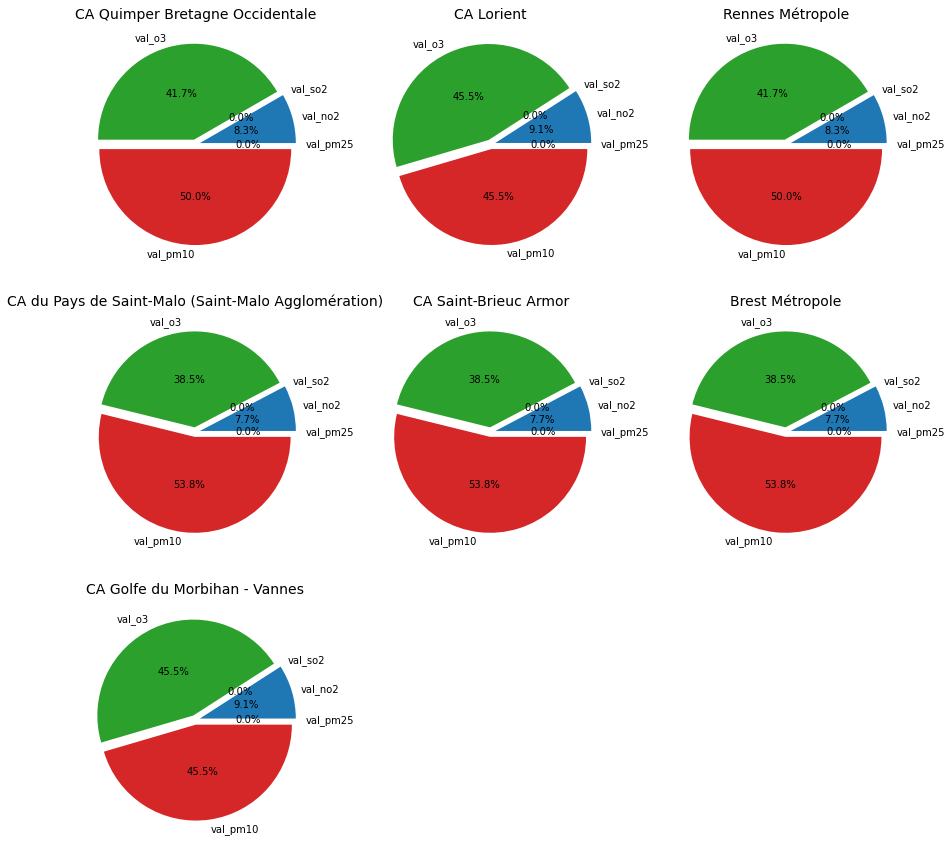

In [55]:
labels = np.array(df_conf1_pic1['lib_zone'])
df_conf1_pic1 = df_conf1_pic1.drop(['lib_zone','date_ech', 'valeur', 'qualif'], axis=1)
x = np.array(df_conf1_pic1)

plt.figure(figsize=[15,15])
i = 1
for ville, indices in zip(labels, x):
    plt.subplot(3, 3, i)
    labels = df_conf1_pic1.columns
    plt.pie(x=indices, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title(f"{ville}", fontsize=14)
    i += 1

Pendant ce dernier pic avant la fin du confinement, nous pouvons remarquer que la composition de l'air n'est pas totalement identique au premier pic. En effet, malgré une forte présence de particules en suspension (pm10) nous pouvons remarquer une valeur d'ozone (o3) plus importante lors de ce deuxième pic.

#### Préparation des données pour une cartographie

In [56]:
df_carto_2 = df_carto[(df_carto['date_ech']==datetime.date(2020, 4, 22))].copy()
df_carto_2 = df_carto_2.drop(['date_ech','qualif'], axis=1)
df_carto_2

,valeur,lib_zone,geom,val_no2,val_so2,val_o3,val_pm10,val_pm25
1778,6,CA Quimper Bretagne Occidentale,POINT (172753.63056731108 6795400.543816281),1,0,5,6,0
1779,5,CA Lorient,POINT (229772.04043578357 6768639.926683848),1,0,5,5,0
1780,6,Rennes Métropole,POINT (349555.0070453745 6789093.386528317),1,0,5,6,0
1781,7,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,POINT (338719.75810268405 6844013.788199687),1,0,5,7,0
1782,7,CA Saint-Brieuc Armor,POINT (269153.2682993477 6832824.934141148),1,0,5,7,0
1783,7,Brest Métropole,POINT (147878.22420658765 6837175.794037035),1,0,5,7,0
1784,5,CA Golfe du Morbihan - Vannes,POINT (269961.1106939723 6746307.8992528645),1,0,5,5,0


# 3. Analyse de la composition de l'air aux pics du 2ème confinement

Nous allons maintenant analyser la composition du pic de début et de fin du 2ème confinement.

In [57]:
df_conf_2 = df_1[(df_1['date_ech']>datetime.date(2020, 9, 30))]
df_conf_2.head()

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,0,0
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,0,0
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0


## 3.1 Visualisation graphique pendant le deuxième confinement

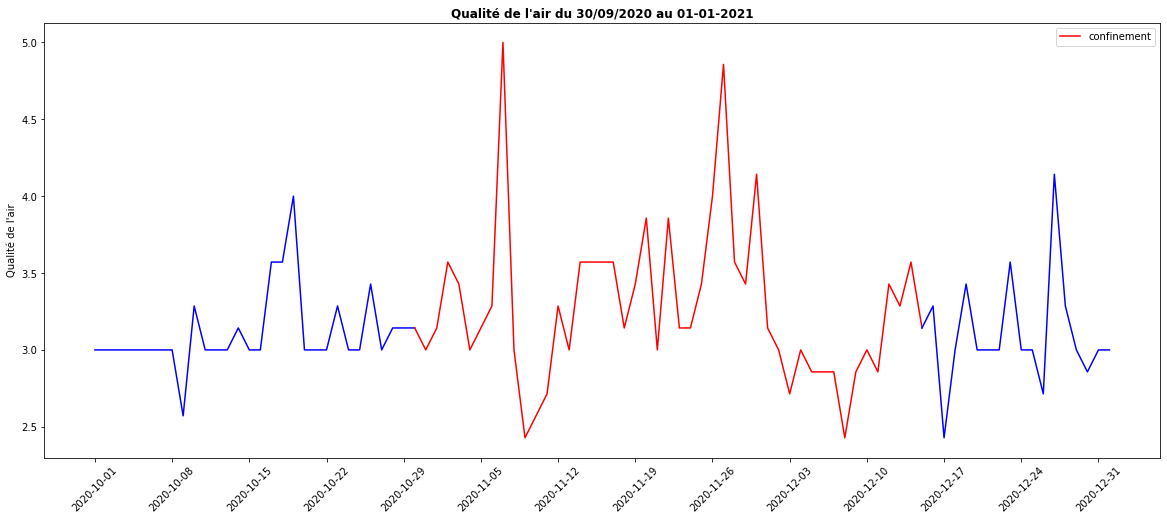

In [58]:
evolution_valeur_conf_2 = df_conf_2.groupby('date_ech')['valeur'].mean()
x_bis_bis = evolution_valeur_conf_2.index
y_bis_bis = np.array(evolution_valeur_conf_2)

index_evolution_valeur_conf2= np.array(pd.DataFrame(evolution_valeur_conf_2).index)

index_start_conf2 = found_index(index_evolution_valeur_conf2, 2020, 10, 30)
index_end_conf2 = found_index(index_evolution_valeur_conf2, 2020, 12, 15)

plt.figure(figsize=(20,8))
plt.plot(x_bis_bis[:index_start_conf2+1], y_bis_bis[:index_start_conf2+1], c='b')
plt.plot(x_bis_bis[index_start_conf2:index_end_conf2+1], y_bis_bis[index_start_conf2:index_end_conf2+1], c='r', label='confinement')
plt.plot(x_bis_bis[index_end_conf2:], y_bis_bis[index_end_conf2:], c='b')
plt.ylabel('Qualité de l\'air')
plt.title('Qualité de l\'air du 30/09/2020 au 01-01-2021', fontdict={'weight':'bold'})
plt.xticks(np.arange(x_bis_bis[0],x_bis_bis[-1], step=7), rotation=45)
plt.legend()
plt.show()

## 3.2 Pic - DEBUT

In [59]:
x_bis_bis = pd.DataFrame(x_bis_bis)
x_bis_bis.index = [i for i in range(len(x_bis_bis))]
y_bis_bis = pd.DataFrame(y_bis_bis)
y_bis_bis.columns= ['Valeur Moyenne']
df_bis_bis = pd.concat([x_bis_bis, y_bis_bis], axis=1)
df_bis_bis.head()

,date_ech,Valeur Moyenne
0,2020-10-01,3.0
1,2020-10-02,3.0
2,2020-10-03,3.0
3,2020-10-04,3.0
4,2020-10-05,3.0


### 3.2.1 Recherche de l'index

In [60]:
df_bis_bis['Valeur Moyenne'].idxmax()

37

In [61]:
df_bis_bis.iloc[37,:]

date_ech          2020-11-07
Valeur Moyenne             5
Name: 37, dtype: object

Le début du pic **max** est le Samedi 07 Novembre 2020 avec une valeur moyenne de 5. 

### 3.2.2 Analyse de la composition de l'air pendant le premier pic

In [62]:
df_conf2_pic1 = df_1[(df_1['date_ech']==datetime.date(2020, 11, 7))].copy()
df_conf2_pic1.head(7)

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
385,2020-11-07,5,Moyen,Rennes Métropole,1,0,3,5,0
386,2020-11-07,5,Moyen,Brest Métropole,1,0,3,5,0
387,2020-11-07,5,Moyen,CA Golfe du Morbihan - Vannes,1,0,3,5,0
388,2020-11-07,5,Moyen,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,3,5,0
389,2020-11-07,5,Moyen,CA Lorient,1,0,3,5,0
390,2020-11-07,5,Moyen,CA Quimper Bretagne Occidentale,1,0,3,5,0
391,2020-11-07,5,Moyen,CA Saint-Brieuc Armor,1,0,3,5,0


### 3.2.3 Visualisation graphique de la composition de l'air par ville au premier pic

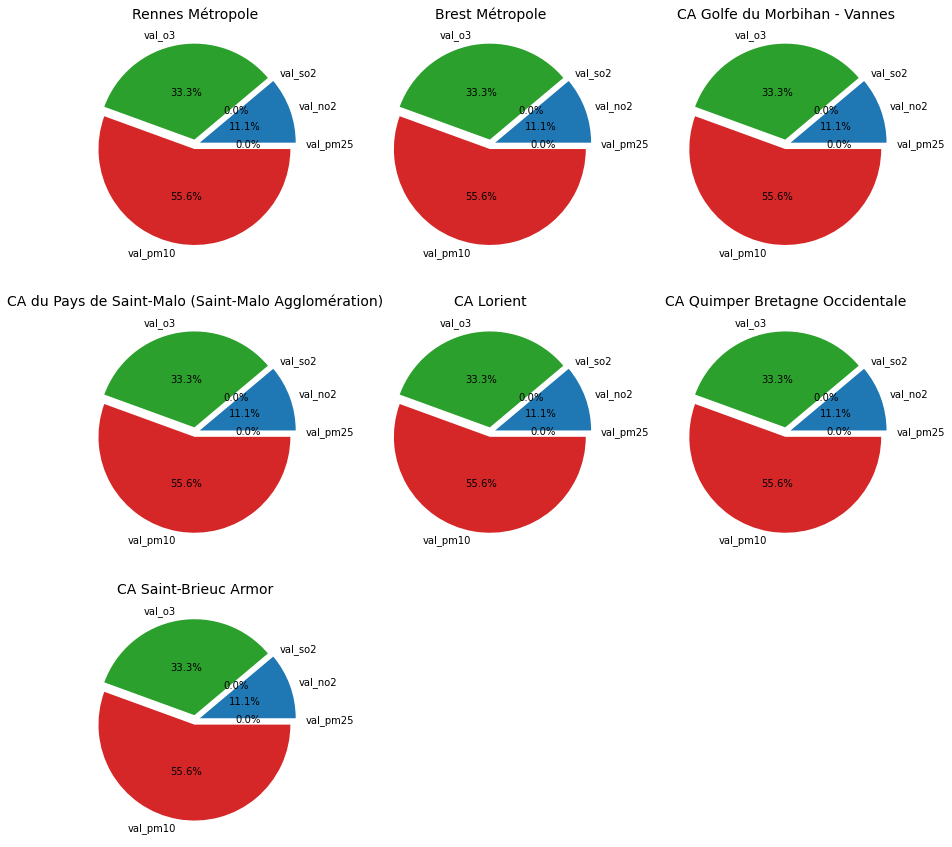

In [63]:
labels = np.array(df_conf2_pic1['lib_zone'])
df_conf2_pic1 = df_conf2_pic1.drop(['lib_zone','date_ech', 'valeur', 'qualif'], axis=1)
x = np.array(df_conf2_pic1)

plt.figure(figsize=[15,15])
i = 1
for ville, indices in zip(labels, x):
    plt.subplot(3, 3, i)
    labels = df_conf2_pic1.columns
    plt.pie(x=indices, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title(f"{ville}", fontsize=14)
    i += 1

Nous pouvons remarquer une similitude dans la repartition des composantes de l'air avec le premier pic du premier confinement où nous retrouvons un fort taux de particules en suspension pm10. 


#### Préparation des données pour une cartographie

In [64]:
df_carto_3 = df_carto[(df_carto['date_ech']==datetime.date(2020, 11, 7))].copy()
df_carto_3 = df_carto_3.drop(['date_ech','qualif'], axis=1)
df_carto_3

,valeur,lib_zone,geom,val_no2,val_so2,val_o3,val_pm10,val_pm25
385,5,Rennes Métropole,POINT (349555.0070453745 6789093.386528317),1,0,3,5,0
386,5,Brest Métropole,POINT (147878.22420658765 6837175.794037035),1,0,3,5,0
387,5,CA Golfe du Morbihan - Vannes,POINT (269961.1106939723 6746307.8992528645),1,0,3,5,0
388,5,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,POINT (338719.75810268405 6844013.788199687),1,0,3,5,0
389,5,CA Lorient,POINT (229772.04043578357 6768639.926683848),1,0,3,5,0
390,5,CA Quimper Bretagne Occidentale,POINT (172753.63056731108 6795400.543816281),1,0,3,5,0
391,5,CA Saint-Brieuc Armor,POINT (269153.2682993477 6832824.934141148),1,0,3,5,0


## 3.3 Pic - FIN

In [65]:
evolution_valeur_conf_2 = df_1[(df_1['date_ech']>=datetime.date(2020, 11, 26))].groupby('date_ech')['valeur'].mean()
x_bis_bis = evolution_valeur_conf_2.index.to_series()
y_bis_bis = np.array(evolution_valeur_conf_2)

x_bis_bis = pd.DataFrame(x_bis_bis)
x_bis_bis.index = [i for i in range(len(x_bis_bis))]
y_bis_bis = pd.DataFrame(y_bis_bis)
y_bis_bis.columns= ['Valeur Moyenne']
df_bis_bis = pd.concat([x_bis_bis, y_bis_bis], axis=1)
df_bis_bis.head()

,date_ech,Valeur Moyenne
0,2020-11-26,4.000000
1,2020-11-27,4.857143
2,2020-11-28,3.571429
3,2020-11-29,3.428571
4,2020-11-30,4.142857


### 3.3.1 Recherche de l'index

In [66]:
df_bis_bis['Valeur Moyenne'].idxmax()

1

In [67]:
df_bis_bis.iloc[1,:]

date_ech          2020-11-27
Valeur Moyenne       4.85714
Name: 1, dtype: object

Le pic **max** est le Vendredi 27 Novembre 2020 avec une valeur moyenne de **4.85**.

### 3.3.2 Analyse de la composition de l'air pendant le deuxième pic

In [68]:
df_conf2_pic2 = df_1[(df_1['date_ech']==datetime.date(2020, 11, 27))].copy()
df_conf2_pic2.head(7)

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
245,2020-11-27,5,Moyen,CA Lorient,2,0,2,5,0
246,2020-11-27,5,Moyen,Brest Métropole,2,0,2,5,0
247,2020-11-27,4,Bon,CA Quimper Bretagne Occidentale,1,0,2,4,0
248,2020-11-27,5,Moyen,CA Golfe du Morbihan - Vannes,2,0,2,5,0
249,2020-11-27,5,Moyen,CA Saint-Brieuc Armor,2,0,2,5,0
250,2020-11-27,5,Moyen,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,2,0,2,5,0
251,2020-11-27,5,Moyen,Rennes Métropole,2,0,2,5,0


### 3.3.3 Visualisation graphique de la composition de l'air par ville au premier pic

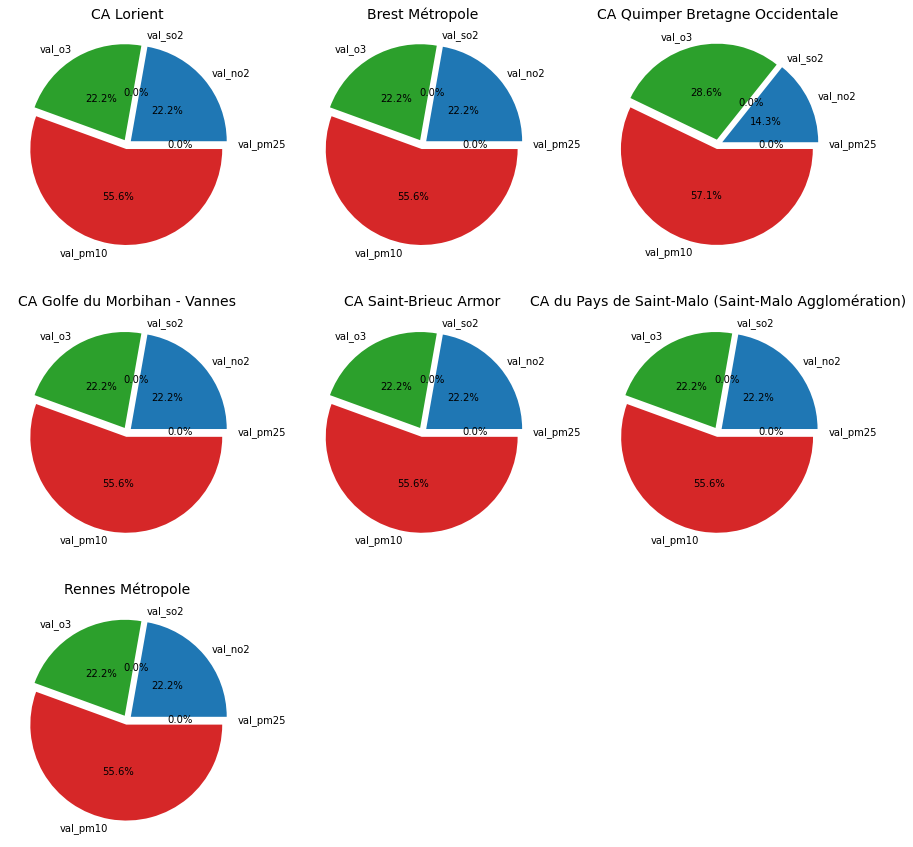

In [69]:
labels = np.array(df_conf2_pic2['lib_zone'])
df_conf2_pic2 = df_conf2_pic2.drop(['lib_zone','date_ech', 'valeur', 'qualif'], axis=1)
x = np.array(df_conf2_pic2)

plt.figure(figsize=[15,15])
i = 1
for ville, indices in zip(labels, x):
    plt.subplot(3, 3, i)
    labels = df_conf2_pic2.columns
    plt.pie(x=indices, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title(f"{ville}", fontsize=14)
    i += 1

Pour ce deuxième et dernier pic, nous pouvons remarquer qu'il n'y a pas la même répartition que pendant le 2ème pic du 1er confinement. En effet, nous pouvons remarquer une valeur d'ozone (o3) plus faible, avec une présence majoritaire de particules fines (pm10) 


#### Préparation des données pour une cartographie

In [70]:
df_carto_4 = df_carto[(df_carto['date_ech']==datetime.date(2020, 11, 7))].copy()
df_carto_4 = df_carto_4.drop(['date_ech','qualif'], axis=1)
df_carto_4

,valeur,lib_zone,geom,val_no2,val_so2,val_o3,val_pm10,val_pm25
385,5,Rennes Métropole,POINT (349555.0070453745 6789093.386528317),1,0,3,5,0
386,5,Brest Métropole,POINT (147878.22420658765 6837175.794037035),1,0,3,5,0
387,5,CA Golfe du Morbihan - Vannes,POINT (269961.1106939723 6746307.8992528645),1,0,3,5,0
388,5,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,POINT (338719.75810268405 6844013.788199687),1,0,3,5,0
389,5,CA Lorient,POINT (229772.04043578357 6768639.926683848),1,0,3,5,0
390,5,CA Quimper Bretagne Occidentale,POINT (172753.63056731108 6795400.543816281),1,0,3,5,0
391,5,CA Saint-Brieuc Armor,POINT (269153.2682993477 6832824.934141148),1,0,3,5,0
